In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s eta 0:00:00


In [4]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

True
Tesla T4


In [5]:
from ultralytics import YOLO

# Cargar modelo preentrenado
model = YOLO("yolov8s.pt")

# Entrenar con nuestros datos
results = model.train(
    data="/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/driveconfig.yaml",
    epochs=100,
    patience=10,
    imgsz=448,
    batch=16,
    device=0,   # usar GPU
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/driveconfig.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, i

In [6]:
!cp -r /content/runs/detect/train /content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/

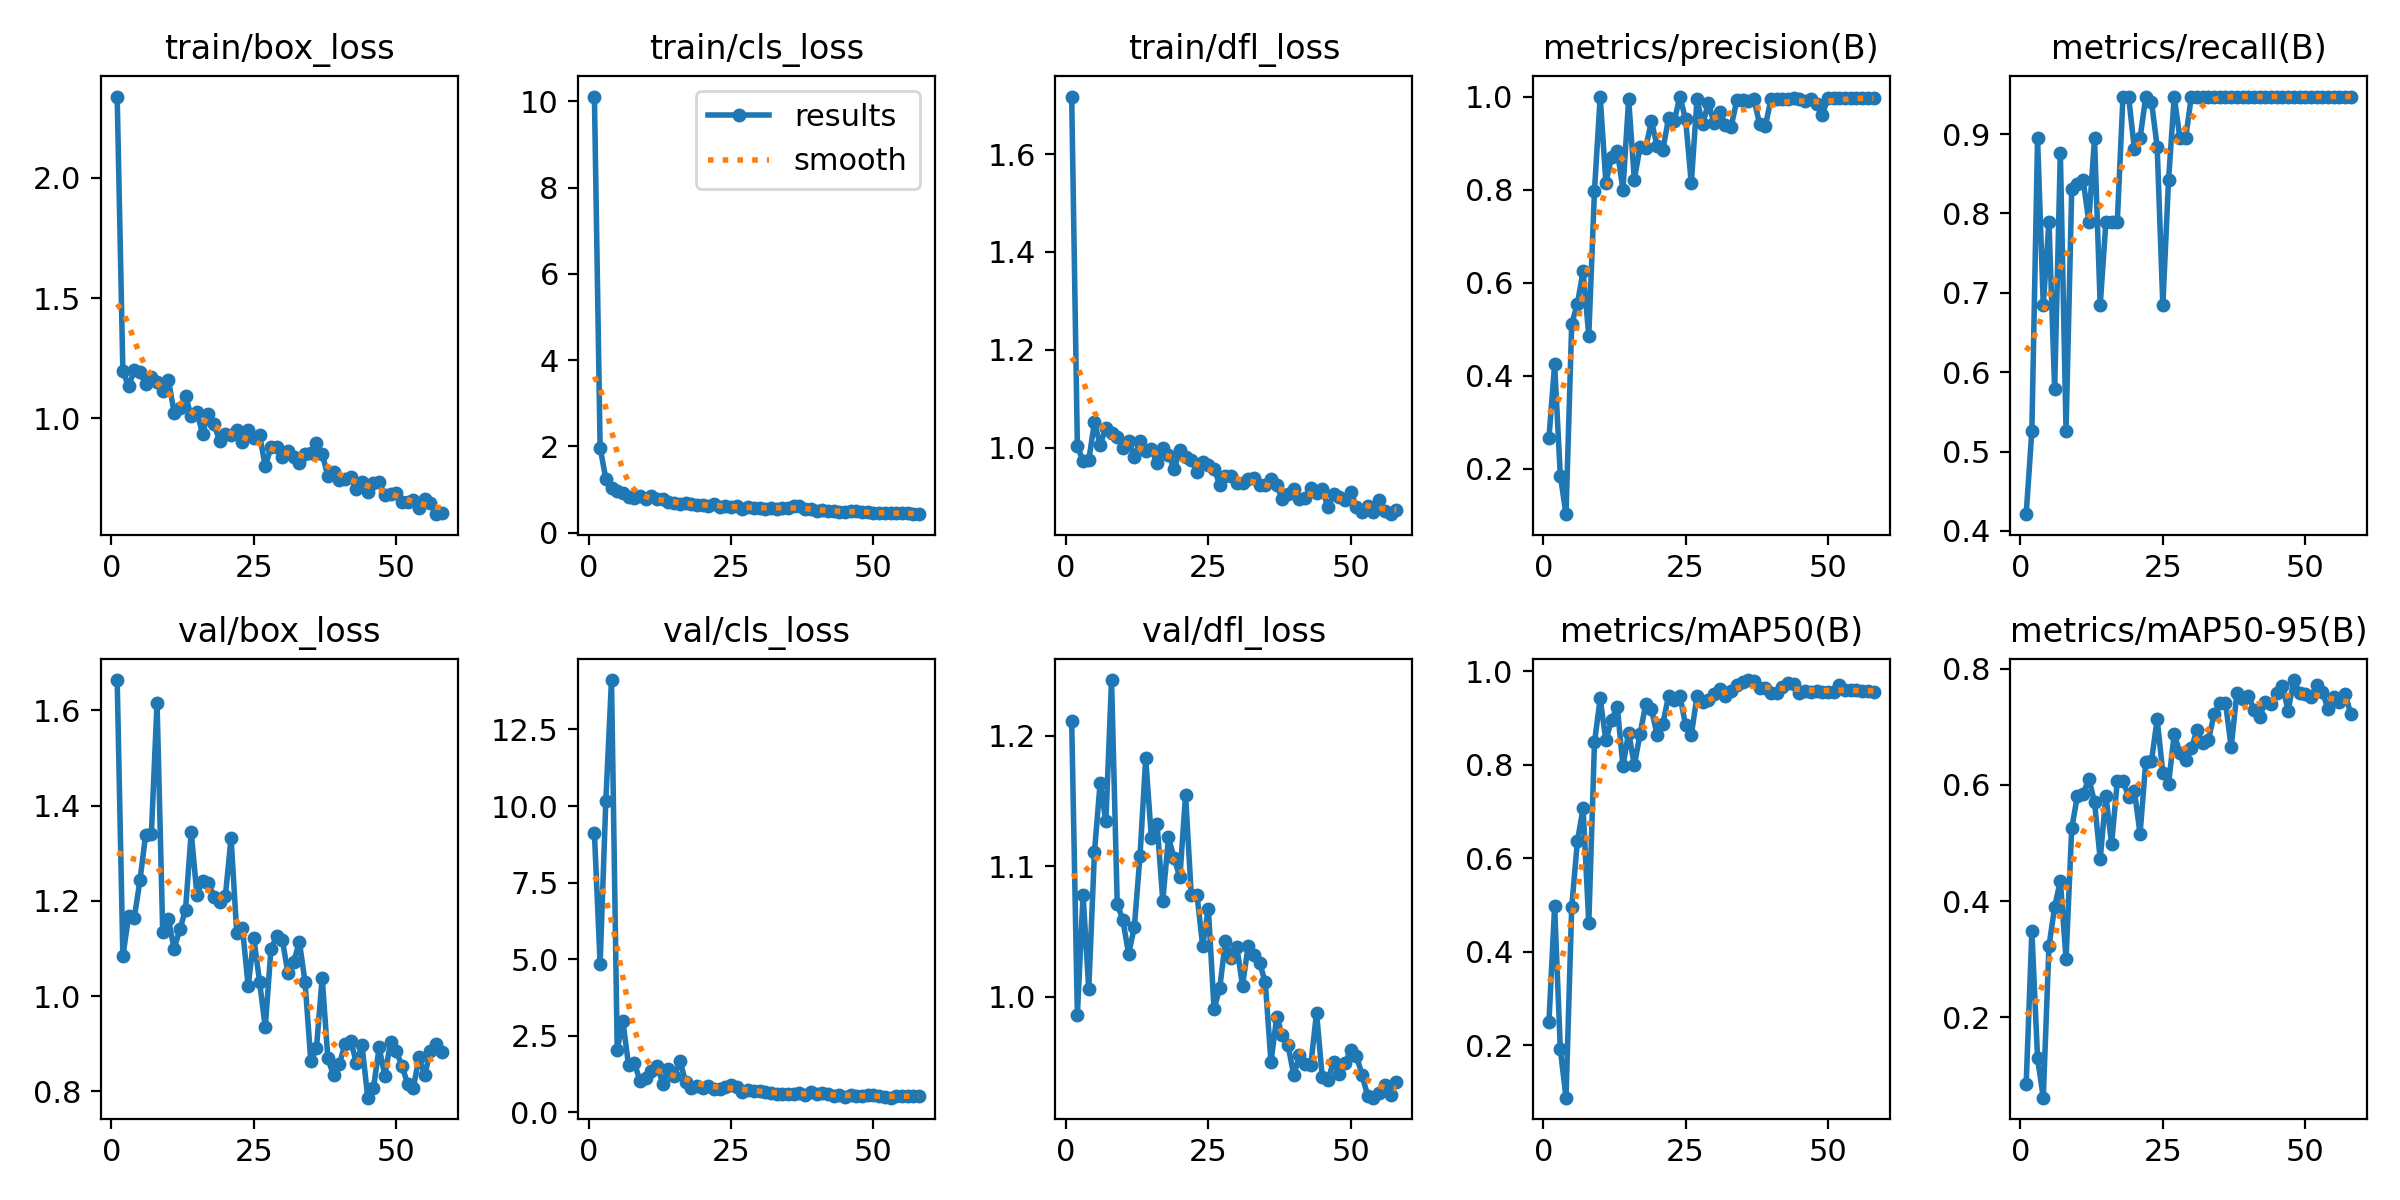

In [8]:
from IPython.display import Image
Image("/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/train/results.png")

In [9]:
metrics = model.val(
    data="/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/driveconfig.yaml",
    split="test",  # usa las imágenes del test
    plots=True
)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.1±0.0 MB/s, size: 60.0 KB)
val: Scanning /content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/labels/test... 8 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 8/8 1.7it/s 4.7s
val: New cache created: /content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.3it/s 0.2s
                   all          8          9      0.993      0.889      0.947      0.824
Speed: 0.1ms preprocess, 15.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/runs/detect/train2


In [10]:
!cp -r /content/runs/detect/train2 /content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/

In [12]:
from ultralytics import YOLO

# Cargar el modelo entrenado
trained_model = YOLO("/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/train/weights/best.pt")

# Hacer predicciones en una sola imagen
results = trained_model.predict(
    source="/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/Lateral/PXL_20210921_094926329.jpg",  # aqui una imagen cualquiera
    save=True,
    conf=0.25
)

# Mostrar la imagen con las predicciones
from IPython.display import Image
Image(filename=results[0].save_dir + "/PXL_20210921_094926329.jpg")


Output hidden; open in https://colab.research.google.com to view.

In [13]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

trained_model = YOLO("/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/train/weights/best.pt")

# Hacer predicciones en TODAS las imágenes que nos dan en clase
results = trained_model.predict(
    source="/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/Lateral",
    save=True,
    conf=0.25
)

# Mostrar todas las imágenes
output_dir = results[0].save_dir  # carpeta donde se guardan los resultados (/content/runs/detect/predict)
for img_file in os.listdir(output_dir):
    if img_file.endswith((".jpg", ".png", ".jpeg")):
        display(Image(filename=os.path.join(output_dir, img_file)))

Output hidden; open in https://colab.research.google.com to view.

In [14]:
trained_model = YOLO("/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/train/weights/best.pt")

# Hacer predicciones en las imagenes tomadas nuestras
results = trained_model.predict(
    source="/content/drive/MyDrive/Dades/Tercer/1rsemestre/PSIV/data-propia",
    save=True,
    conf=0.25
)


output_dir = results[0].save_dir
for img_file in os.listdir(output_dir):
    if img_file.endswith((".jpg", ".png", ".jpeg")):
        display(Image(filename=os.path.join(output_dir, img_file)))

Output hidden; open in https://colab.research.google.com to view.